# Exploratory Data Analysis on Emergency Healthcare Calls
#### By Vedant Thakur

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [4]:
df = pd.read_csv('Emergency Call Report.csv')

In [5]:
df.head()

,Year,Month,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
0,2025,Feb,155200,98964,3777,5773,3706,42980
1,2025,Jan,130982,87815,3217,4179,3178,32593
2,2024,Dec,133725,86832,3634,3735,3035,36489
3,2024,Nov,153698,93710,3010,4421,4133,48424
4,2024,Oct,214604,108207,6307,5792,8885,80804


In [6]:
df.shape

(107, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Year                                       107 non-null    int64 
 1   Month                                      107 non-null    object
 2   Total Number of Calls                      107 non-null    int64 
 3   Total Number of Doctors Consultancy        107 non-null    int64 
 4   Number of Total Health Information         107 non-null    int64 
 5   Number of Total Ambulance Information      107 non-null    int64 
 6   Number of Total Complaints                 107 non-null    int64 
 7   Number of Calls To Know About The Service  107 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.8+ KB


In [8]:
df.describe()

,Year,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
count,107.000000,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000
mean,2020.205607,2.340316e+05,1.544553e+05,15714.728972,9240.317757,6924.457944,47509.102804
std,2.601662,3.697001e+05,2.681351e+05,23104.165341,15330.680874,10484.201602,61227.797516
min,2016.000000,5.143200e+04,3.816200e+04,3010.000000,220.000000,77.000000,4075.000000
25%,2018.000000,9.918850e+04,6.081800e+04,6858.000000,836.000000,697.000000,18536.500000
50%,2020.000000,1.424000e+05,9.489300e+04,10841.000000,4734.000000,4133.000000,28895.000000
75%,2022.000000,2.025520e+05,1.215265e+05,13291.000000,8658.500000,8262.000000,45822.500000
max,2025.000000,2.329457e+06,1.703100e+06,173306.000000,91751.000000,59760.000000,342434.000000


In [9]:
df.isnull().sum()

Year                                         0
Month                                        0
Total Number of Calls                        0
Total Number of Doctors Consultancy          0
Number of Total Health Information           0
Number of Total Ambulance Information        0
Number of Total Complaints                   0
Number of Calls To Know About The Service    0
dtype: int64

### Visualisation

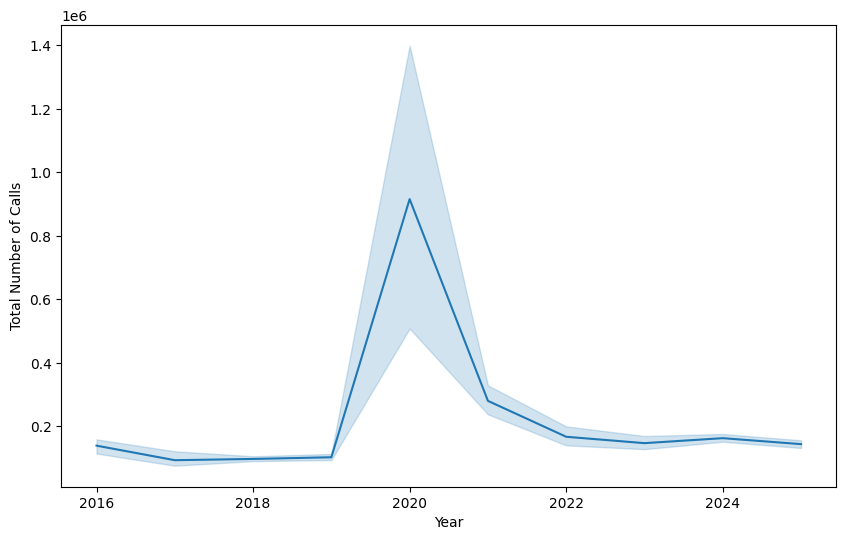

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Total Number of Calls', data=df)
plt.show()

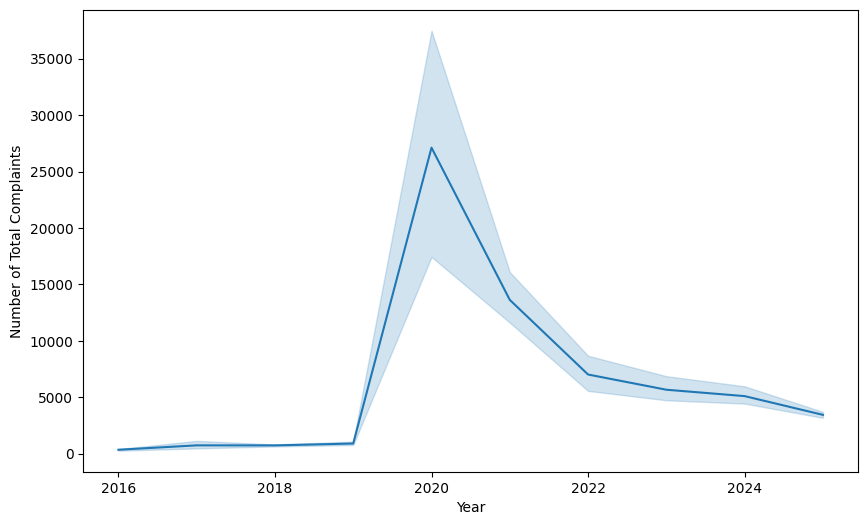

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Number of Total Complaints', data=df)
plt.show()

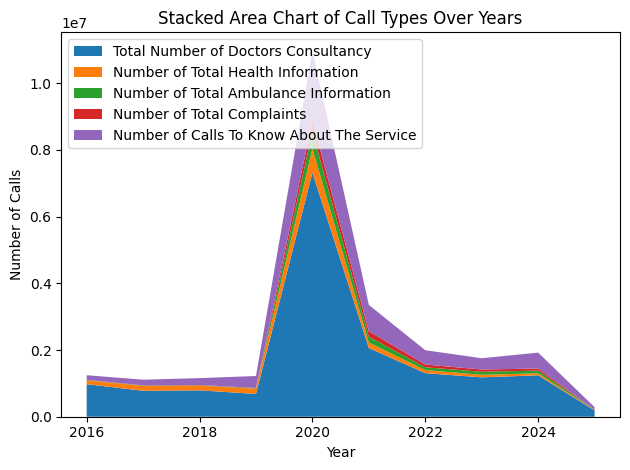

In [15]:
df_grouped = df.groupby('Year').sum().reset_index()

columns = [
    'Total Number of Doctors Consultancy',
    'Number of Total Health Information',
    'Number of Total Ambulance Information',
    'Number of Total Complaints',
    'Number of Calls To Know About The Service'
]

plt.stackplot(df_grouped['Year'], [df_grouped[col] for col in columns], labels=columns)
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.title('Stacked Area Chart of Call Types Over Years')
plt.tight_layout()
plt.show()

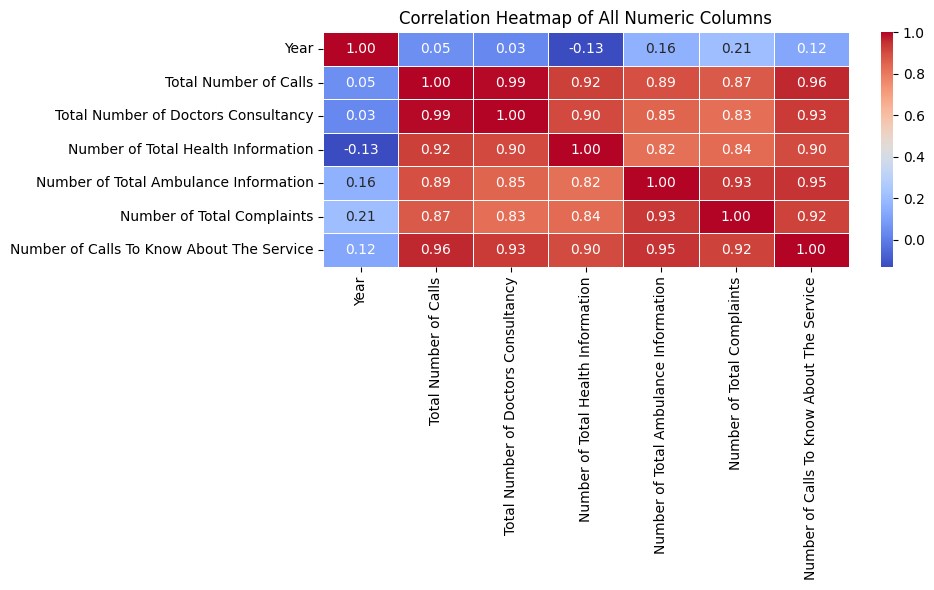

In [17]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Numeric Columns')
plt.tight_layout()
plt.show()

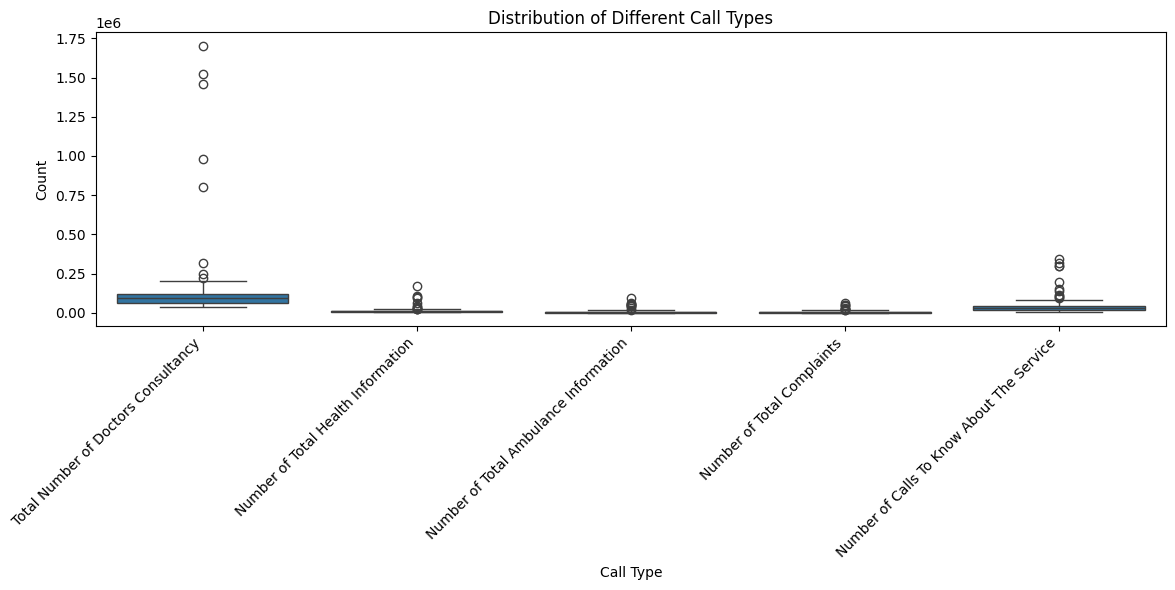

In [18]:
melted = df.melt(id_vars=['Year'], 
                 value_vars=[
                     'Total Number of Doctors Consultancy',
                     'Number of Total Health Information',
                     'Number of Total Ambulance Information',
                     'Number of Total Complaints',
                     'Number of Calls To Know About The Service'
                 ],
                 var_name='Call Type', value_name='Count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x='Call Type', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Different Call Types')
plt.tight_layout()
plt.show()
